## 4. End of Distribution imputation 

1. End of tail imputation is roughly equivalent to arbitrary value imputation, but it automatically selects the arbitrary values at the end of the variable distributions.
2. This method is suitable for numerical variables.
3. If normally distributed, we use the mean +/- 3 times Standard Deviation.
4. If the distribution is skewed, use the IQR proximity rule.
    #### Skewed distributions
            The general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows:
            IQR = 75th Quantile –25th Quantile.
            Upper limit = 75th Quantile + IQR ×3.
            Lower limit = 25th Quantile - IQR ×3.
        


#### 5. Assumptions: Data is not missing at random; Data is skewed at the tail-end


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\titanic train.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


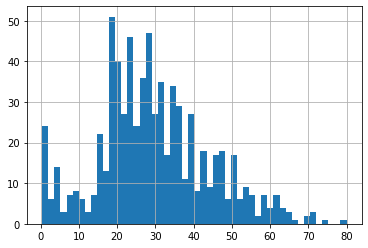

In [4]:
#Here we'll use the end of distribution values - for this variablewe'll use values in range 70-80:

df.Age.hist(bins=50)

### Check the normal distribution curve to understand what we are doing below:

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.spss-tutorials.com%2Fnormal-distribution%2F&psig=AOvVaw27bHSxqZ7gptftT5EFgiHC&ust=1609483872873000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCPj74efQ9-0CFQAAAAAdAAAAABAD

In [5]:
#To get the End of distribution values using 3*std value:

extreme=df.Age.mean()+3*df.Age.std()

In [6]:
extreme

73.27860964406095

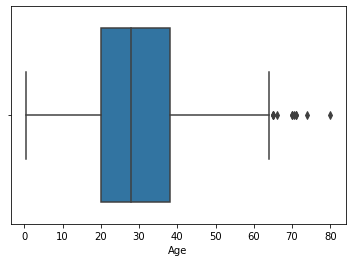

In [7]:
### Chcek for the outliers

import seaborn as sns
sns.boxplot('Age',data=df)

In [8]:
### FUNCTION TO HANDLE MISSING VALUES USING E0D TECHNIQUE:

def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [9]:
##Call the function
impute_nan(df,'Age',df.Age.median(),extreme)

In [10]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


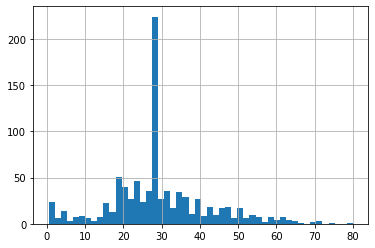

In [11]:
##Check the age - histogram:

df['Age'].hist(bins=50)

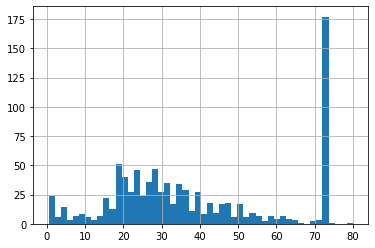

In [12]:
##Check after the imputation.

df['Age_end_distribution'].hist(bins=50)

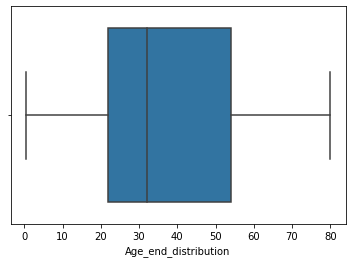

In [13]:
## see the plot using box plot and also check for the outliers.

sns.boxplot('Age_end_distribution',data=df)

#### 1. Here we can see that the ouliers are also handled.

### ADVANTAGES AND DISADVANTAGES:

1. Advantages: Can bring out the importance of missing values;
2. Disadvantages: Changes Co-variance/variance; may create biased data.
